<h2>ALY6015_SpringA2020_Pragati_Koladiya_Assignment_2</h2>

<p> <b>Week: </b>2</p>
<p> <b>Author:</b> Pragati Koladiya </p> 
<p> <b>Tittle:</b> Assignment 2 </p>



<h1>Part 2 - Hypothesis Testing </h1>

<h3>Import packages</h3>

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import pylab 
import statsmodels.api as sm

from scipy import stats
from scipy.stats import f_oneway

from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

from numpy.random import seed
from numpy.random import randn

from pylab import rcParams
rcParams['figure.figsize'] = (23, 8)
sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')

<h3>Acquire and load the data</h3>

In [2]:
#Read data from google sheets 
data_path_SFO = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSflVY5vdYoRSDfDFJTPoiu9K6H_-2XMLsW5-AZNs6aAZ45yUHn-YZUCS9NeoatHZT2TDiRO21S98nt/pub?gid=536532021&single=true&output=csv"
data_path_LAX = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRDFHLH8EpTa7RoesL_Z8eMeJv6Dj3GURRgsnnNQmv_S9aD7olxZDIT7cI9WpV9IoI6VGognoanXxVW/pub?gid=735387729&single=true&output=csv"

#read SFO dataset
sf = pd.read_csv(data_path_SFO)

#read LAX dataset
la = pd.read_csv(data_path_LAX)

<h3>Column Definitions:</h3>
<ul>
    <li><b>Date</b> - The date that the observation was recorded.</li>
    <li><b>SFO - Avg. Daily Miles Driven Per Hour</b> - The average daily milage driven per hour in city SF(San Francisco).</li>
    <li><b>Marketing_Campaign</b> - A binary field that is set to either 1 for when the marketing campaign were active or 0 for when the marketing campaign were deactivated. </li>
</ul>

<h2> Working with SFO dataset </h2>

In [3]:
sf.head(5)

,Date,SFO - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
0,09/14/2019,71.735773,0
1,09/15/2019,84.051385,0
2,09/16/2019,48.580306,0
3,09/17/2019,87.045828,0
4,09/18/2019,21.020850,0


In [4]:
list(sf)

['Date', 'SFO - Avg. Daily Miles Driven Per Hour', 'Marketing_Campaign']

<h2>Test setup: </h2>
<ul>

   <li> 
        <b>Null hypothesis:</b> <i>The average miles driven per hour before campaign  <b>will be effected</b> after campaign</i>
   </li>
  
   <li>
       <b>Alternative hypothesis:</b> <i>The average miles driven per hour before campaign <b>will not be effected</b> after campaign.</i>
    </li>
    <li> The alpha-value will be set to .05
    </li>
</ul>

In [5]:
sf.describe()

,SFO - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
count,103.000000,103.000000
mean,57.964064,0.281553
std,31.105058,0.451956
min,3.189480,0.000000
25%,40.780047,0.000000
50%,63.811228,0.000000
75%,83.838581,1.000000
max,113.773589,1.000000


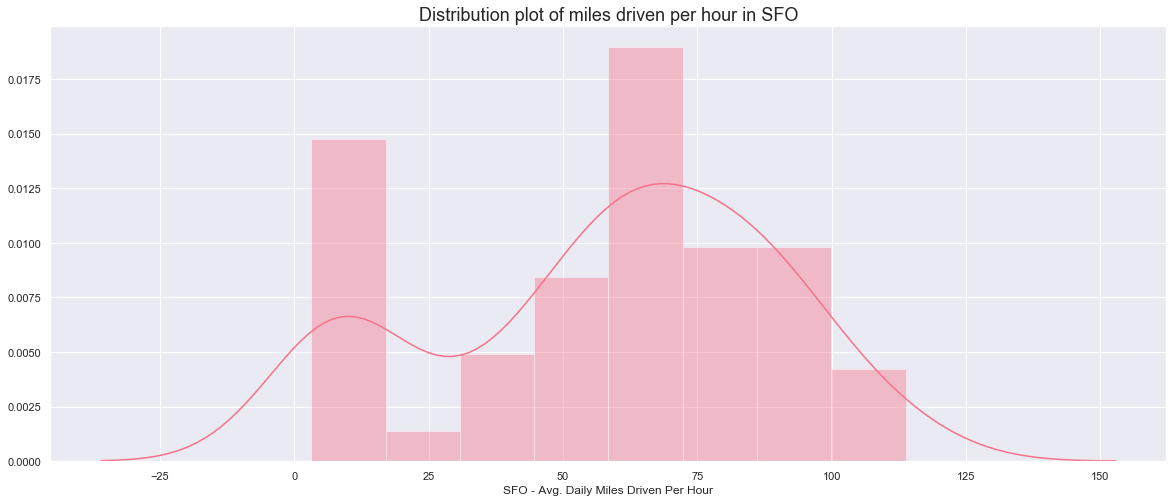

In [6]:
#distplot for SFO - Avg. Daily Miles Driven Per Hour
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
sns.set(style='whitegrid')
sns.set(palette='husl')

plt.title("Distribution plot of miles driven per hour in SFO", fontsize=18)

ax = sns.distplot(sf['SFO - Avg. Daily Miles Driven Per Hour'], bins = 8)


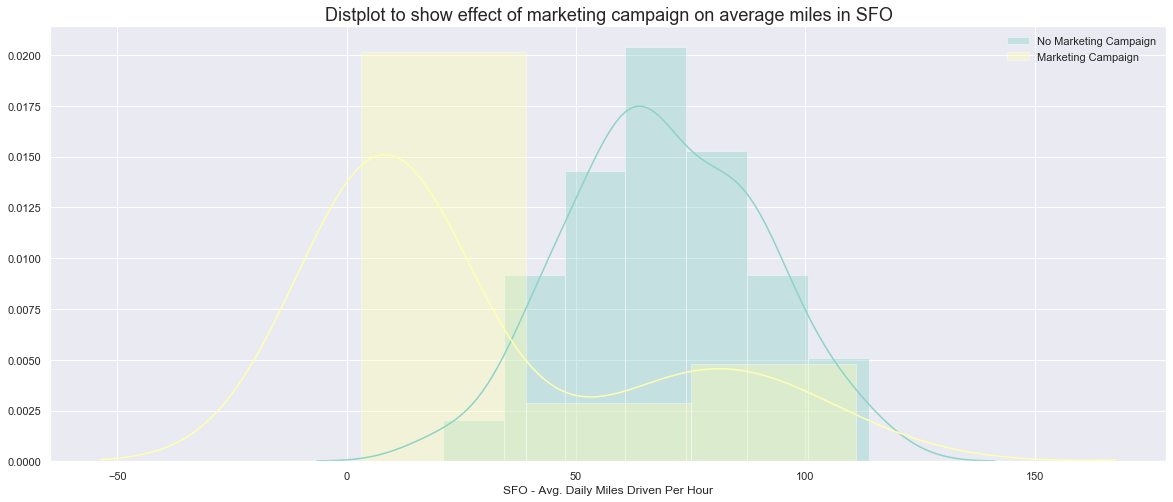

In [7]:
#Distplot for no marketing and marketing
data0 = sf['SFO - Avg. Daily Miles Driven Per Hour'].loc[sf['Marketing_Campaign']==0]
data1 = sf['SFO - Avg. Daily Miles Driven Per Hour'].loc[sf['Marketing_Campaign']==1]

sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
sns.set(style='whitegrid')
sns.set(palette='Set3')

ax = sns.distplot(data0, hist=True)
ax = sns.distplot(data1, hist=True)

plt.title("Distplot to show effect of marketing campaign on average miles in SFO", fontsize=18)
plt.legend(['No Marketing Campaign','Marketing Campaign'])

In [8]:
data0

0       71.735773
1       84.051385
2       48.580306
3       87.045828
4       21.020850
          ...    
69      85.683106
70      50.922348
71      38.326017
101     69.857224
102    103.305247
Name: SFO - Avg. Daily Miles Driven Per Hour, Length: 74, dtype: float64

In [9]:
data0.mean()

69.32633362486484

=> Average is higher before marketing campign.

In [10]:
data1.mean()

28.970686860448275

=> Average is lower after marketing campign

In [11]:
#generate three independent samples
data0 = sf['SFO - Avg. Daily Miles Driven Per Hour'].loc[sf['Marketing_Campaign']==0]
data1 = sf['SFO - Avg. Daily Miles Driven Per Hour'].loc[sf['Marketing_Campaign']==1]

#compare samples
stat, p = f_oneway(data0, data1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=52.923, p=0.000
Different distributions (reject H0)


- <i>Here, we will reject the null hypothesis because alpha is greater then p value. The null hyothesis is the average number of miles driven by an Uber driver before the marketing campaign has changed after the campaign.</i>

<h2><b>Conclusion:</b></h2> 
<p>From the distribution plots, we can observe that before 
    campaign the average number of miles driven is between 80-100 which is highest  
    and after the campaign  less than 25. So we reject the null hypothesis 
    which is an effect of marketing campaign.</p> 
<p>Moreover, there is no effect due to marketing campaign in the number of miles driven per hour. If we consider the avergae values for before and after campaign we can infer the same.</p>

<h2>Working with LAX dataset</h2>

<h3>Column Definitions:</h3>
<ul>
    <li><b>Date</b> - The date that the observation was recorded.</li>
    <li><b>LAX - Avg. Daily Miles Driven Per Hour</b> - The average daily milage driven per hour in city LA(Los Angeles).</li>
    <li><b>Marketing_Campaign</b> - A binary field that is set to either 1 for when the marketing campaign were active or 0 for when the marketing campaign were deactivated. </li>
</ul>

In [13]:
la.head(5)

,Date,LAX - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
0,09/14/2019,90.472743,0
1,09/15/2019,50.583589,0
2,09/16/2019,130.024909,0
3,09/17/2019,71.786879,0
4,09/18/2019,21.848068,0


In [14]:
la.isnull().sum()

Date                                      0
LAX - Avg. Daily Miles Driven Per Hour    0
Marketing_Campaign                        0
dtype: int64

<h2>Perform light data modifications</h2>

- <i>LAX - Avg. Daily Miles Driven Per Hour is average of distance covered. <b>Distance can't be negative</b>,  and never decreases. Distance is a scalar quantity, or a magnitude. So it can't be negative. So we have to clear negative values from data.

In [15]:
df_la_cleaned = la.loc[(la['LAX - Avg. Daily Miles Driven Per Hour'] > 0)]

In [16]:
list(df_la_cleaned)

['Date', 'LAX - Avg. Daily Miles Driven Per Hour', 'Marketing_Campaign']

<h2>Test setup: </h2>
<ul>

   <li> 
        <b>Null hypothesis:</b> <i>The average miles driven per hour before campaign did not change after campaign.</i>
   </li>
   
   <li>
       <b>Alternative hypothesis:</b> <i>The average miles driven per hour before campaign changed after campaign.</i>
    </li>
</ul>

In [17]:
df_la_cleaned.describe()

,LAX - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
count,99.000000,99.000000
mean,127.066711,0.303030
std,61.169375,0.461907
min,21.848068,0.000000
25%,80.271049,0.000000
50%,121.300504,0.000000
75%,172.858910,1.000000
max,273.550819,1.000000


Text(0.5, 1.0, 'Distribution plot of miles driven per hour in LAX')

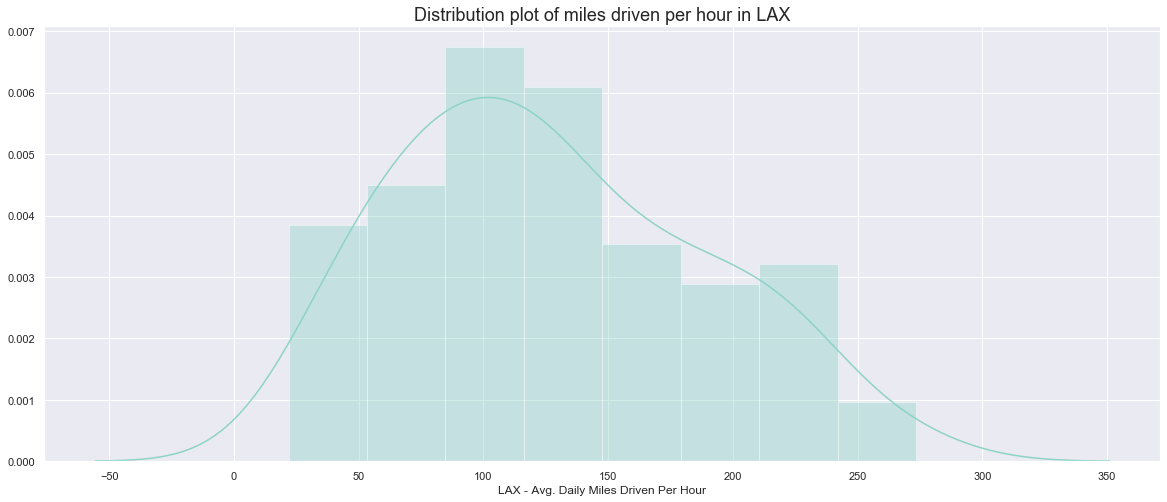

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
sns.set(style='whitegrid')
sns.set(palette='Set3')

ax = sns.distplot(df_la_cleaned['LAX - Avg. Daily Miles Driven Per Hour'], bins = 8)

plt.title("Distribution plot of miles driven per hour in LAX", fontsize=18)

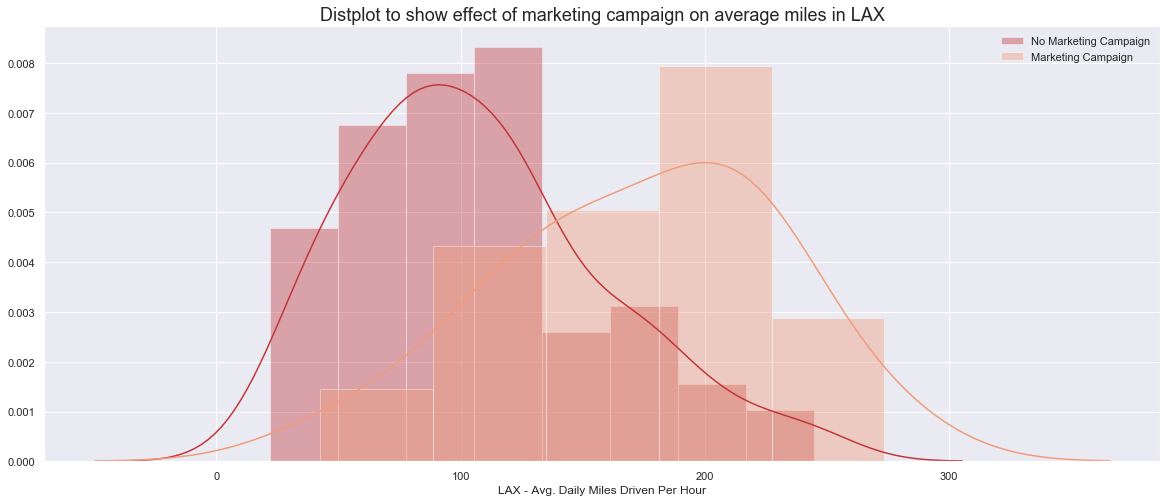

In [19]:
data0_la = df_la_cleaned['LAX - Avg. Daily Miles Driven Per Hour'].loc[df_la_cleaned['Marketing_Campaign']==0]
data1_la = df_la_cleaned['LAX - Avg. Daily Miles Driven Per Hour'].loc[df_la_cleaned['Marketing_Campaign']==1]

sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
sns.set(style='whitegrid')
sns.set(palette='RdBu')

ax = sns.distplot(data0_la, hist=True)
ax = sns.distplot(data1_la, hist=True)

plt.title("Distplot to show effect of marketing campaign on average miles in LAX", fontsize=18)
plt.legend(['No Marketing Campaign','Marketing Campaign'])

In [20]:
data0_la

0       90.472743
1       50.583589
2      130.024909
3       71.786879
4       21.848068
          ...    
68      60.223917
69      31.781950
70      89.756213
101    166.622538
102    212.845667
Name: LAX - Avg. Daily Miles Driven Per Hour, Length: 69, dtype: float64

In [21]:
data0_la.mean()

107.08663156681158

=> Average is lower before marketing campign. 

In [22]:
data1_la.mean()

173.0208936986666

=> Average is higher after marketing campign.

In [23]:
#generate three independent samples
data0_la = la['LAX - Avg. Daily Miles Driven Per Hour'].loc[la['Marketing_Campaign']==0]
data1_la = la['LAX - Avg. Daily Miles Driven Per Hour'].loc[la['Marketing_Campaign']==1]
#compare samples
stat, p = f_oneway(data0_la, data1_la)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=33.120, p=0.000
Different distributions (reject H0)


- <i>Here, we will reject the null hypothesis because alpha is greater then p value. The null hyothesis is the average number of miles driven by an Uber driver before the marketing campaign has effected after the campaign.</i>

<h2><b>Conclusion:</b></h2> 
<p>From the distribution plots, we can observe that before campaign the average number of miles driven is less than 110 and after the campaign it is more than 110. So we reject the null hypothesis which is there is an no effect due to marketing campaign.</p>
    
<p>Moreover, there is an effect due to marketing campaign in the number of miles driven per hour. If we consider the avergae values for before and after campaign we can infer the same.</p>